# IA & Data science (LU3IN026) -- 2019-2020
*Cai Eddy et Moukouri Steve*

## Travail complémentaire et optionnel :

Plutôt que de s'intéresser à une base simplifiée à deux labels, le problème réel est bien plus complexe et contient dix classes à distinguer. Les algorithmes restent globalement les mêmes que pour le problème simplifié mais leurs précisions s'ammenuisent.

In [1]:
#################################### IMPORT ####################################
#################################### BIBLIOTHEQUE ####################################
import numpy as np
import pandas as pd
import time as time
import matplotlib.pyplot as plt

#################################### FICHIER PYTHON ####################################
from fichier_python import Classifiers as cl
from fichier_python import utils as ut

## Chargement Base de données

In [2]:
#################################### TRAIN ####################################
train = pd.read_csv("fichier_csv/train_multi.csv", sep=';', header=None)
train.columns = pd.read_csv("fichier_csv/names.csv", sep=';').columns
train_label = train["label"].values
train_data = train.iloc[:,1:785].values

#################################### TEST ####################################
test = pd.read_csv("fichier_csv/test_multi.csv", sep=';', header=None)
test.columns = pd.read_csv("fichier_csv/names.csv", sep=';').columns
test_label = test["label"].values
test_data = test.iloc[:,1:785].values

#################################### EVAL ####################################
eval_ = pd.read_csv("fichier_csv/eval_multi.csv", sep=';', header=None)
eval_.columns = pd.read_csv("fichier_csv/names.csv", sep=';').columns
eval_data = eval_.iloc[:,1:785].values

#################################### VARIABLE ####################################
dimension = len(train_data[0])
nb_exemple = len(train)

Le nouveau fichier identique au précédent est une matrice qui contient pour chaque exemple la valeur des pixels. Comme vu au préalable, une représentation tronquée de ce dernier serait trouvé en calculant la somme des distances euclidiennes de chaque pixel par rapport à l'origine et de la normaliser. On peut donc obtenir une vision hypothétique comme on peut le voir ci-dessous : 

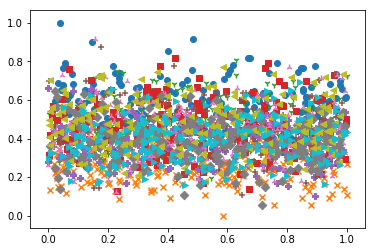

In [3]:
data_for_plot,label_for_plot = ut.for_the_plot_2D_origine_0(train_data,train_label,dimension)
ut.plot2DSet(data_for_plot,label_for_plot)

L'utilisation de reshape avec les bonnes valeurs (les images ont des tailles de 28x28) permet cependant une visualisation de ces données comme on peut le voir avec l'exemple ci-dessous :

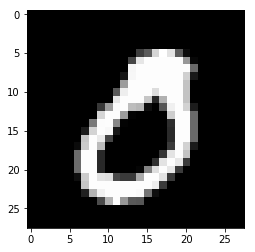

In [4]:
ut.afficheImage(train_data[0])

## Classifieur Linéaire : 

Une façon simple mais bancale d'essayer de classer les images seraient d'utiliser une approche linéaire. Dans ce cas de figure on crée un hyperplan (représenté dans le code par un vecteur aléatoire) qui sépare les exemples en deux catégories. 

In [5]:
# Date début du classifieur
debut_ClassifierLineaireRandom = time.time()

# Création d'un classifieur linéaire aléatoire de dimension 'dimension' (ici dans ce projet, dimension = 784)
un_classifieur = cl.ClassifierLineaireRandom(dimension)

# Par définition, ce classifieur n'a pas besoin d'entraînement
# (vide)

print("Classification du dataset avec ClassifierLineaireRandom :")
###############################################################################################################
# Classification du dataset (contrôle de predict et score) et affichage de l'évolution du taux de 
# bonne classification


i_bis = 0
num = 0
nb_correct = 0
for i in range(nb_exemple):
    predi_i = un_classifieur.predict(test_data[i])
    if predi_i == test_label[i]:
        nb_correct += 1
    if (i+1)%200 == 0:
        print("\t Pour %.d | taux : %.2f" %(num,((nb_correct/(i_bis+1))*100))+'%')
        i_bis = 0
        nb_correct = 0
        num +=1
    i_bis += 1

###############################################################################################################
    
# Affichage du taux de bonne classification    
accuracy_ClassifierLineaireRandom = un_classifieur.accuracy(test_data,test_label)
print("Taux de bonne classification sur le dataset: ", accuracy_ClassifierLineaireRandom)
fin_ClassifierLineaireRandom = time.time() - debut_ClassifierLineaireRandom
print("Temps d'éxécution pour le ClassifierLineaireRandom : %.3f secondes" % fin_ClassifierLineaireRandom)

Classification du dataset avec ClassifierLineaireRandom :
	 Pour 0 | taux : 0.00%
	 Pour 1 | taux : 36.82%
	 Pour 2 | taux : 0.00%
	 Pour 3 | taux : 0.00%
	 Pour 4 | taux : 0.00%
	 Pour 5 | taux : 0.00%
	 Pour 6 | taux : 0.00%
	 Pour 7 | taux : 0.00%
	 Pour 8 | taux : 0.00%
	 Pour 9 | taux : 0.00%
Taux de bonne classification sur le dataset:  0.037
Temps d'éxécution pour le ClassifierLineaireRandom : 0.567 secondes


A l'issue de l'expérimentation, on obtient un taux de bonne classification quasiment nul pour chaque label. Ce dernier est donc totalment innéficace et il est donc logique de s'intéresser à une approche plus précise pour espérer avoir des catégories cohérentes.

## Classiffieur K plus proche voisin (KNN) :

   Pour palier le problème de précision abordé précédemment, le KNN s'annonce redoutable. La distance choisie pour déterminer les voisins les plus proches est ici la distance eucludienne (ou norme) qui permet naturellement de calculer la distance entre 2 points à n dimensions. On compare donc les labels des k voisins les plus proches pour obtenir une meilleure classification.

In [6]:
# Date début du classifieur
debut_ClassifierKNN = time.time()

# NOMBRE VOISIN
nb_voisin = 9

# Création d'un classifieur KNN de dimension 'dimension' (ici dans ce projet, dimension = 784) et de nb_voisin
un_classifieur = cl.ClassifierKNN(dimension,nb_voisin)

# APPRENTISSAGE
un_classifieur.train(train_data,train_label)

print("Classification du dataset avec ClassifierKNN :")
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
############################## LE TEMPS D'EXECUTION DU CLASSIFIEUR EST TRES LONG ##############################
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
###############################################################################################################
# Classification du dataset (contrôle de predict et score) et affichage de l'évolution du taux de 
# bonne classification

i_bis = 0
num = 0
nb_correct = 0
for i in range(nb_exemple):
    predi_i = un_classifieur.predict(test_data[i])
    if predi_i == test_label[i]:
        nb_correct += 1
    if (i+1)%200 == 0:
        print("\t Pour %.d | taux : %.2f" %(num,((nb_correct/(i_bis+1))*100))+'%')
        i_bis = 0
        nb_correct = 0
        num +=1
    i_bis += 1

###############################################################################################################

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", un_classifieur.accuracy(test_data,test_label))
fin_ClassifierKNN = time.time() - debut_ClassifierKNN
print("Temps d'éxécution pour le ClassifierKNN : %.3f secondes" % fin_ClassifierKNN)

Classification du dataset avec ClassifierKNN :
	 Pour 0 | taux : 97.50%
	 Pour 1 | taux : 99.00%
	 Pour 2 | taux : 84.08%
	 Pour 3 | taux : 87.56%
	 Pour 4 | taux : 87.56%
	 Pour 5 | taux : 82.09%
	 Pour 6 | taux : 92.54%
	 Pour 7 | taux : 93.03%
	 Pour 8 | taux : 80.10%
	 Pour 9 | taux : 85.07%
Taux de bonne classification sur le dataset:  0.8925
Temps d'éxécution pour le ClassifierKNN : 6762.711 secondes


Comme espéré le classifieur KNN corrige la mauvaise précision (ici, une précision d'environ 90% pour 9 voisins) que nous avions eue avec un simple classifieur linéaire. Cependant bien que beaucoup plus précis, le temps de calcul est bien important. L'idéal à ce stade serait de potentiellement pouvoir trouver un classifieur avec un temps de calcul supportable et une précision suffisante (supérieure à 50%).

## Classiffieur Perceptron :

Bien que le classifieur KNN nous ait permis de résoudre le problème du taux de bonne classification, son utilisation deumeure trop longue. 
Cela nous a conduit à nous intéresser au classiffieur Perceptron. Le principe du Perceptron est simple et est similaire à ce qui déjà été évoqué dans la partie principale. Le seule point qui varie dans le cas des labels supplémentaires est qu'à chaque label est associé un coefficiant(qui lui est propre) qui augmente si la prédiction est juste. 

In [7]:
# Date début du classifieur
debut_ClassifierPerceptron = time.time()

# taux d'apprentissage (learning) et nombre d'itération
learning = 0.01
nb_iteration = 100
# Création d'un classifieur Perceptron de dimension 'dimension' (ici dans ce projet, dimension = 784) 
# et du taux d'apprentissage
un_classifieur = cl.ClassifierPerceptron(dimension,learning)

# APPRENTISSAGE
un_classifieur.train(train_data,train_label,nb_iteration)

print("Classification du dataset avec ClassifierPerceptron :")
###############################################################################################################
# Classification du dataset (contrôle de predict et score) et affichage de l'évolution du taux de 
# bonne classification

i_bis = 0
num = 0
nb_correct = 0
for i in range(nb_exemple):
    predi_i = un_classifieur.predict(test_data[i])
    if predi_i == test_label[i]:
        nb_correct += 1
    if (i+1)%200 == 0:
        print("\t Pour %.d | taux : %.2f" %(num,((nb_correct/(i_bis+1))*100))+'%')
        i_bis = 0
        nb_correct = 0
        num +=1
    i_bis += 1

###############################################################################################################

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", un_classifieur.accuracy(test_data,test_label))
fin_ClassifierPerceptron = time.time() - debut_ClassifierPerceptron
print("Temps d'éxécution pour le ClassifierPerceptron : %.3f secondes" % fin_ClassifierPerceptron)

Classification du dataset avec ClassifierPerceptron :
	 Pour 0 | taux : 98.00%
	 Pour 1 | taux : 59.20%
	 Pour 2 | taux : 68.66%
	 Pour 3 | taux : 74.13%
	 Pour 4 | taux : 28.36%
	 Pour 5 | taux : 0.00%
	 Pour 6 | taux : 68.66%
	 Pour 7 | taux : 59.70%
	 Pour 8 | taux : 85.07%
	 Pour 9 | taux : 56.72%
Taux de bonne classification sur le dataset:  0.601
Temps d'éxécution pour le ClassifierPerceptron : 11.032 secondes


Le classfieur Perceptron répond de façon mitigé aux problèmes que nous nous étions fixés, à savoir: un temps d'éxécution correct (ici, environ 11 secondes avec un nombre d'itérations = 100) et un taux de bonne classification satisfaisant (ici, une précision approximative en fonction des labels, avec un taux d'apprentissage = 0.01).
Ainsi dans ce cas de figure le classifieur ne semble pas se montrer sufisament efficace pour couvrir l'ensemble du problème (la classe 5 par exemple n'est pas distinguée, elle est confondue avec les autres), cependant son tri reste potable et une majorité de classe peuvent tout de même être différenciée. 

## Classiffieur PerceptronKernel :

Le classifieur Perceptron "simple" ne répondant pas totalement à nos attentes, nous avons une nouvelle fois décidé d'étudier un nouveau classifieur à savoir le Perceptron Kernel. Bien que son temps d'exécution soit logiquement long ( limitant les tests) , son fort taux de précision vu dans la partie précédente nous a conduit à nous y intéressé une nouvelle fois.

In [8]:
# Date début du classifieur
debut_ClassifierPerceptronKernel = time.time()

# taux d'apprentissage (learning) et nombre d'itération
learning = 0.01
nb_iteration = 10
kernel = ut.KernelPoly()
# Création d'un classifieur Perceptron de dimension 'dimension' (ici dans ce projet, dimension = 784) 
# et du taux d'apprentissage
un_classifieur = cl.ClassifierPerceptronKernel(dimension,learning,kernel)

# APPRENTISSAGE
un_classifieur.train(train_data,train_label,nb_iteration)

print("Classification du dataset avec ClassifierPerceptron :")
###############################################################################################################
# Classification du dataset (contrôle de predict et score) et affichage de l'évolution du taux de 
# bonne classification

i_bis = 0
num = 0
nb_correct = 0
for i in range(nb_exemple):
    predi_i = un_classifieur.predict(test_data[i])
    if predi_i == test_label[i]:
        nb_correct += 1
    if (i+1)%200 == 0:
        print("\t Pour %.d | taux : %.2f" %(num,((nb_correct/(i_bis+1))*100))+'%')
        i_bis = 0
        nb_correct = 0
        num +=1
    i_bis += 1

###############################################################################################################

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", un_classifieur.accuracy(test_data,test_label))
fin_ClassifierPerceptronKernel = time.time() - debut_ClassifierPerceptronKernel
print("Temps d'éxécution pour le ClassifierPerceptron : %.3f secondes" % fin_ClassifierPerceptronKernel)

Classification du dataset avec ClassifierPerceptron :
	 Pour 0 | taux : 98.00%
	 Pour 1 | taux : 67.66%
	 Pour 2 | taux : 72.14%
	 Pour 3 | taux : 75.62%
	 Pour 4 | taux : 27.36%
	 Pour 5 | taux : 0.00%
	 Pour 6 | taux : 73.13%
	 Pour 7 | taux : 63.18%
	 Pour 8 | taux : 85.07%
	 Pour 9 | taux : 59.70%
Taux de bonne classification sur le dataset:  0.6245
Temps d'éxécution pour le ClassifierPerceptron : 13051.667 secondes


Cette fois ci le Kernel obtient un taux de précision similaire à son prédécesseur pour un temps significativement plus long. Son utilisation dans le cas d'un grand nombre de label est donc superflu au regard de son prédécesseur.

En conclusion les méthodes d'apprentissages qui se trouvaient redoutable dans le cas restreint (à deux labels) perdent en précision et gagne en temps de calcul. Bien que ne pouvant pas être qualifiés d'inutiles (un taux de bonnes classifications de 60% pour la plupart), les classifieurs étudiés ne semblent pas recouvrir l'ensemble du problème en un temps raisonnable et nous oriente vers la recherche d'autres méthodes plus judicieuses.

# Evaluation :

Pour appuyer nos recherches , nous avons fait une série de tests avec différents paramétrages sur les différents classifieurs : les fichiers résultats joints dans le dossier contienent les labels attribués aux donnés apres apprentissage. 

## resultats-1.csv (Perceptron : learning = 0.01 et nb_iteration = 100)

In [9]:
learning = 0.01
nb_iteration = 100
un_classifieur = cl.ClassifierPerceptron(dimension,learning)
un_classifieur.train(train_data,train_label,nb_iteration)
ident = eval_.iloc[:,0].values
eval_label = np.array([(un_classifieur.predict(i)) for i in eval_data])
resultat = open("fichier_csv/resultat-1.csv", "w")
for (ide,predict_label) in zip(ident,eval_label):
    resultat.write(str(ide)+";"+str(predict_label)+"\n")
resultat.close()

## resultats-2.csv (Perceptron : learning = 0.001 et nb_iteration = 1000)

In [10]:
learning = 0.001
nb_iteration = 1000
un_classifieur = cl.ClassifierPerceptron(dimension,learning)
un_classifieur.train(train_data,train_label,nb_iteration)
ident = eval_.iloc[:,0].values
eval_label = np.array([(un_classifieur.predict(i)) for i in eval_data])
resultat = open("fichier_csv/resultat-2.csv", "w")
for (ide,predict_label) in zip(ident,eval_label):
    resultat.write(str(ide)+";"+str(predict_label)+"\n")
resultat.close()

## resultats-3.csv (KNN : nb_voisin = 5)

In [11]:
nb_voisin = 5
un_classifieur = cl.ClassifierKNN(dimension,nb_voisin)
un_classifieur.train(train_data,train_label)
ident = eval_.iloc[:,0].values
eval_label = np.array([(un_classifieur.predict(i)) for i in eval_data])
resultat = open("fichier_csv/resultat-3.csv", "w")
for (ide,predict_label) in zip(ident,eval_label):
    resultat.write(str(ide)+";"+str(predict_label)+"\n")
resultat.close()

## resultats-4.csv (KNN : nb_voisin = 17)

In [12]:
nb_voisin = 17
un_classifieur = cl.ClassifierKNN(dimension,nb_voisin)
un_classifieur.train(train_data,train_label)
ident = eval_.iloc[:,0].values
eval_label = np.array([(un_classifieur.predict(i)) for i in eval_data])
resultat = open("fichier_csv/resultat-4.csv", "w")
for (ide,predict_label) in zip(ident,eval_label):
    resultat.write(str(ide)+";"+str(predict_label)+"\n")
resultat.close()

## resultats-5.csv (PerceptronKernel : learning = 0.01 et nb_iteration = 100)

In [13]:
learning = 0.01
nb_iteration = 10
kernel = ut.KernelPoly()
un_classifieur = cl.ClassifierPerceptronKernel(dimension,learning,kernel)
un_classifieur.train(train_data,train_label,nb_iteration)
ident = eval_.iloc[:,0].values
eval_label = np.array([(un_classifieur.predict(i)) for i in eval_data])
resultat = open("fichier_csv/resultat-5.csv", "w")
for (ide,predict_label) in zip(ident,eval_label):
    resultat.write(str(ide)+";"+str(predict_label)+"\n")
resultat.close()